### Ejemplo con few shot examples: análisis de sentimientos



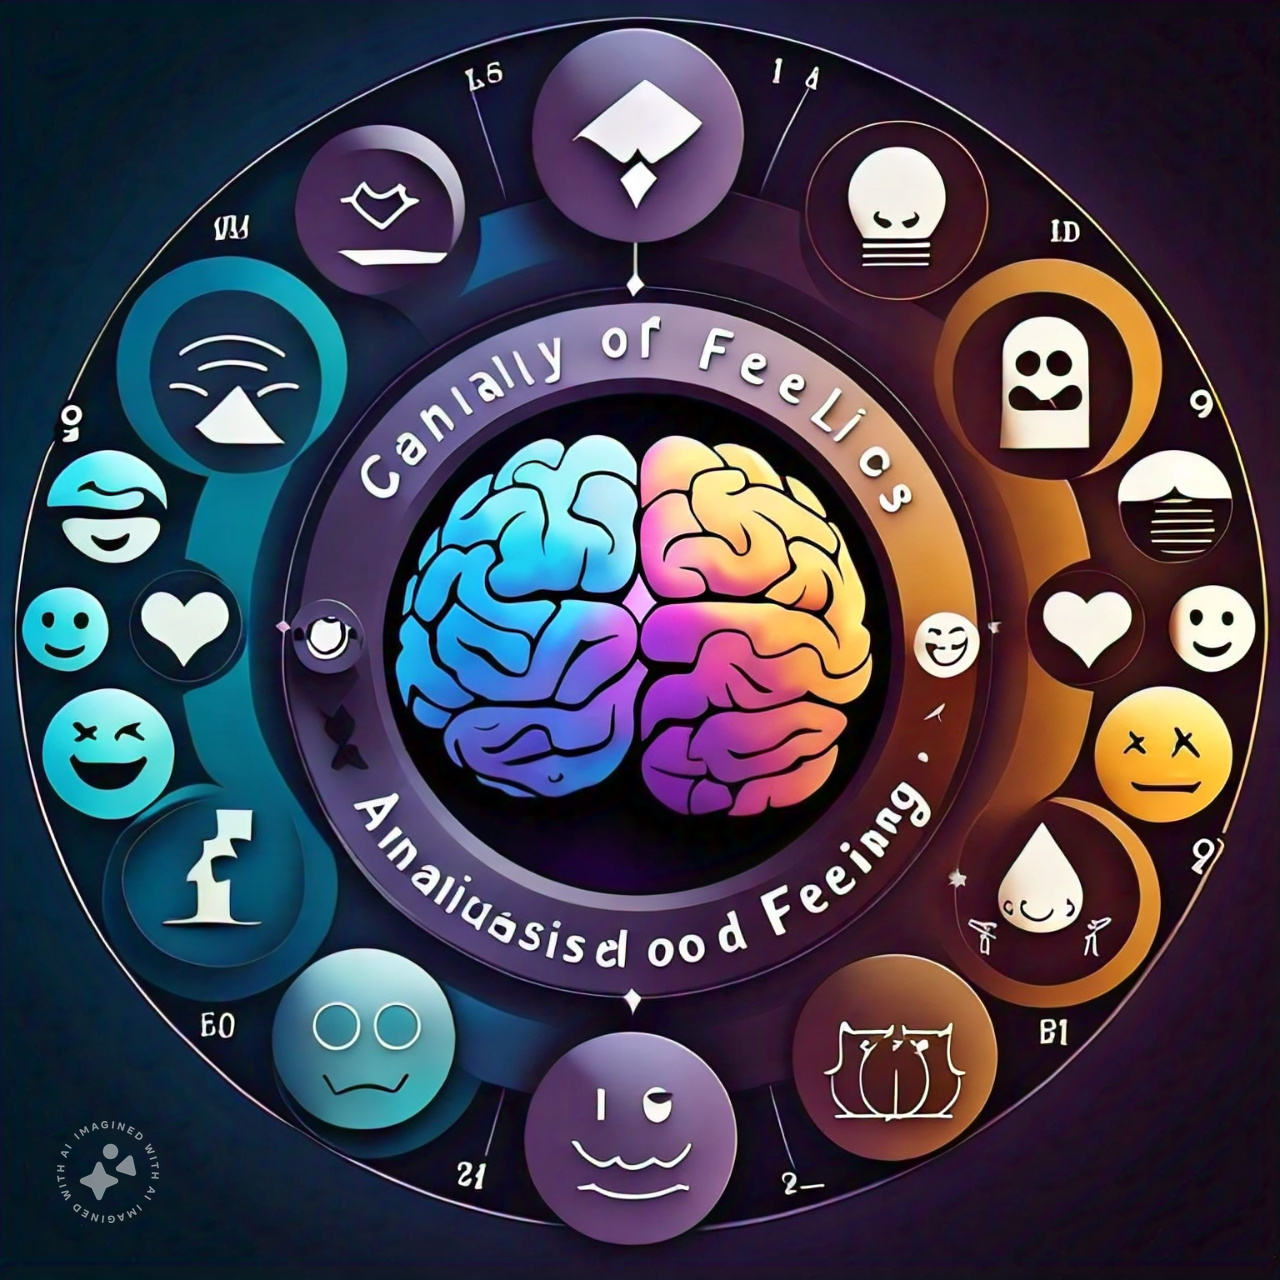

In [3]:
!pip3 install langchain-core==0.3.21 langchain-ollama==0.2.0 

In [4]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate, FewShotPromptTemplate


In [7]:
local_llm = 'llama3.2'
llm = ChatOllama(model=local_llm, temperature=0)

In [8]:

parser = StrOutputParser()

In [9]:
chain1 = llm | parser

Analiza la respuesta del modelo sin dar ejemplos del formato de la respuesta:

In [ ]:
chain1.invoke("Classify the sentiment of this sentence: the book was good as I expected.")

'The sentiment of this sentence is neutral with a slightly positive tone. The use of "good" and "as I expected" suggests that the speaker\'s expectations were met, which implies a level of satisfaction. However, the phrase "as I expected" also has a somewhat bland or unenthusiastic connotation, which tempers the overall positivity of the sentence. Overall, the sentiment is neither strongly positive nor negative, but rather a mild and neutral assessment.'

Ahora creamos un ejemplo de prompt con pregunta/respuesta y un set de ejemplos de respuestas en el formato deseado:

In [20]:
example_prompt = PromptTemplate.from_template("Question: {question}\n{answer}")
examples = [
    {
        "question": "Classify the sentiment of this sentence:the book wasn't so good as I expected.",
        "answer": """
Sentiment: NEUTRAL/NEGATIVE
Do not write any explication please.
""",
    },
    {
        "question": "Classify the sentiment of this sentence:the book was good, I appreciated it",
        "answer": """
Sentiment: POSITIVE
Do not write any explication please.
""",
    },
    {
        "question": "Classify the sentiment of this sentence:the book was fantastic!",
        "answer": """
Sentiment: VERY POSITIVE
Do not write any explication please.
""",
    },
    {
        "question": "Classify the sentiment of this sentence:the book was horrible!",
        "answer": """
Sentiment: NEGATIVE/VERY NEGATIVE
Do not write any explication please.
""",
    },
]

Analiza la respuesta del modelo:

In [26]:
prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

chain = prompt | llm | parser
print(
    chain.invoke({"input": "Classify the sentiment of this sentence: the book was horrible, as I expected."})
)

1. Sentiment: NEUTRAL/NEGATIVE

2. Sentiment: POSITIVE

3. Sentiment: VERY POSITIVE

4. Sentiment: NEGATIVE/VERY NEGATIVE

5. Sentiment: MIXED (NEUTRAL)
